In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pyparsing'

In [2]:
dataset = pd.read_csv(r"C:\Users\HP\Desktop\Python\Vs_Python\Projects\Email_Spam_Detection\Dataset\spam.csv",encoding='latin1')

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
dataset.rename(columns={"v1":"target","v2":"Text"},inplace=True)

In [37]:
dataset.isnull().sum()

target    0
Text      0
dtype: int64

In [40]:
dataset.duplicated().sum()

np.int64(403)

In [42]:
dataset.drop_duplicates(keep='first',inplace=True)

In [43]:
df = dataset.copy()

In [44]:
df.head()

,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


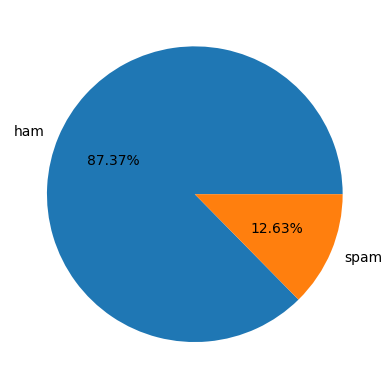

In [45]:
plt.pie(df['target'].value_counts(),autopct="%0.2f%%",labels=['ham','spam'])
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
Encode = LabelEncoder()

df['target'] = Encode.fit_transform(df['target'])
df.head()


,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
df['num_chars']=df['Text'].apply(len)

In [49]:
df.head()

,target,Text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [50]:
import spacy
nlp = spacy.load("en_core_web_sm")
df['Text_tokens'] = df['Text'].apply(lambda x: [token.text for token in nlp(x)])

In [51]:
df['Text_tokens'] = df['Text_tokens'].apply(len)

In [ ]:
def count_sentences(text):
    doc = nlp(text)
    return len(list(doc.sents))

df['sentence_count'] = df['Text'].apply(count_sentences)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int64 
 1   Text            5169 non-null   object
 2   num_chars       5169 non-null   int64 
 3   Text_tokens     5169 non-null   int64 
 4   sentence_count  5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


In [54]:
corr_dataset = df[['num_chars','Text_tokens','sentence_count','target']]

<Axes: >

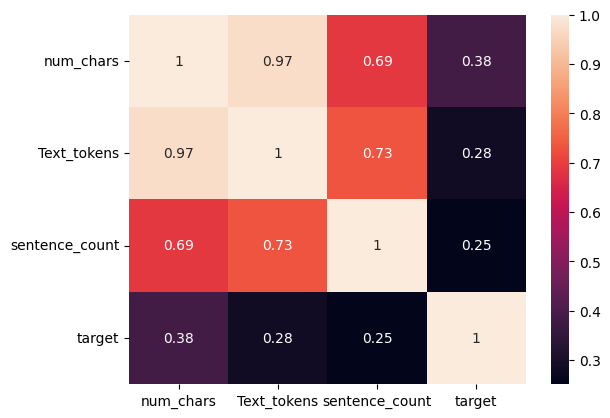

In [55]:
sns.heatmap(corr_dataset.corr(), annot=True)

In [56]:
df[df['target']==0][['num_chars','Text_tokens','sentence_count']].describe()

,num_chars,Text_tokens,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.919176,1.961913
std,56.358207,13.224373,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,27.000000


In [57]:
df[df['target']==1][['num_chars','Text_tokens','sentence_count']].describe()

,num_chars,Text_tokens,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,28.165391,3.062787
std,30.137753,7.361204,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,224.000000,49.000000,9.000000


In [97]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
import spacy
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_sm")
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    doc = nlp(text)

    lemmatized = []

    for token in doc:
        if token.text.isalnum() and not token.is_stop and not token.is_punct:
            lemmatized.append(token.lemma_)

    # Apply stemming
    stemmed = [ps.stem(word) for word in lemmatized]

    return " ".join(stemmed)

In [104]:
transform_text('Running quickly is better than walking slowly.')

'run quickli well walk slowli'

In [106]:
df['Transform_text']=df['Text'].apply(transform_text)

In [118]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [119]:
spam_wc=wc.generate(df[df['target']==1]['Transform_text'].str.cat(sep=" "))

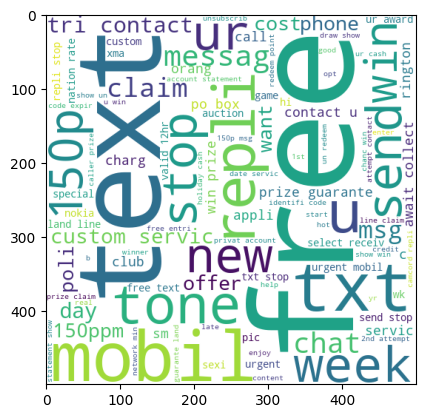

In [120]:
plt.imshow(spam_wc)

In [121]:
ham_wc=wc.generate(df[df['target']==0]['Transform_text'].str.cat(sep=" "))

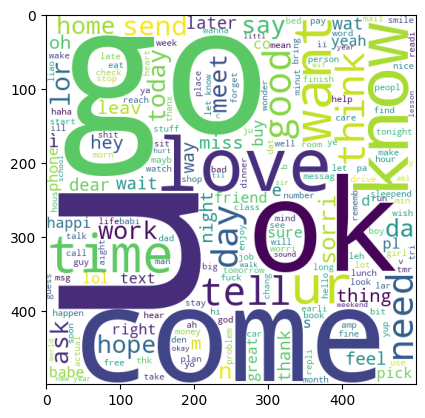

In [122]:
plt.imshow(ham_wc)

In [125]:
spam_corpus = []
for msg in df[df['target']==1]['Transform_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [126]:
len(spam_corpus)

9583

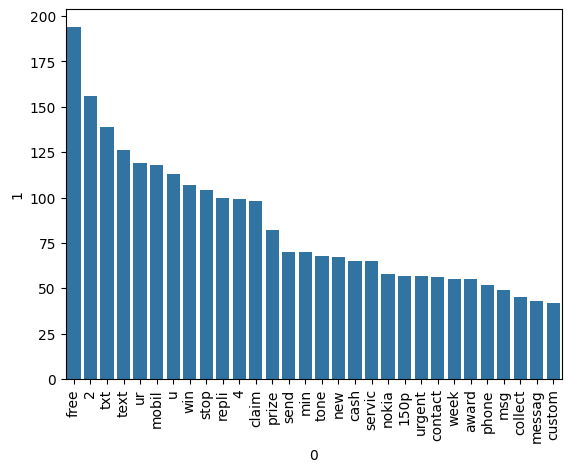

In [136]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [137]:
ham_corpus = []
for msg in df[df['target']==0]['Transform_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

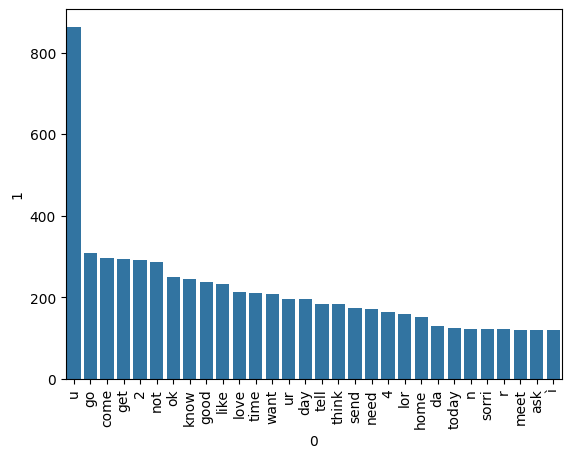

In [138]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [139]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int64 
 1   Text            5169 non-null   object
 2   num_chars       5169 non-null   int64 
 3   Text_tokens     5169 non-null   int64 
 4   sentence_count  5169 non-null   int64 
 5   Transform_text  5169 non-null   object
dtypes: int64(4), object(2)
memory usage: 282.7+ KB


In [143]:
X = tfidf.fit_transform(df['Transform_text']).toarray()

In [144]:
y = df['target'].values

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [148]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [149]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [150]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8346228239845261
[[748 148]
 [ 23 115]]
0.4372623574144487


In [151]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [152]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806576402321083
[[895   1]
 [ 19 119]]
0.9916666666666667


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [155]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [156]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [157]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [158]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.971953578336557, 0.957983193277311)

In [159]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.957983193277311
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.8404255319148937
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9423076923076923
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.9013539651837524
Precision -  0.9090909090909091
For  BgC
Accuracy -  0.9642166344294004
Precision -  0.8976377952755905
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9506769825918762
Precision -  1.0


In [162]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))